Missing Values:
Student_ID       0
Name             0
Age              0
Math_Score       1
Science_Score    1
English_Score    0
dtype: int64


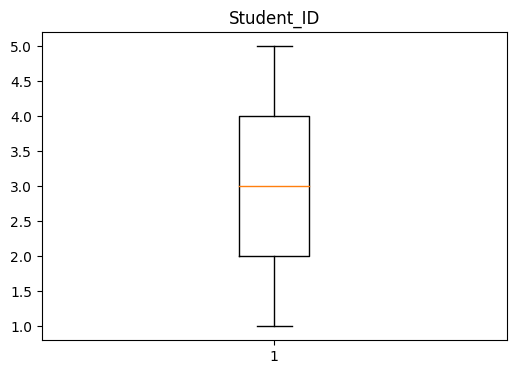

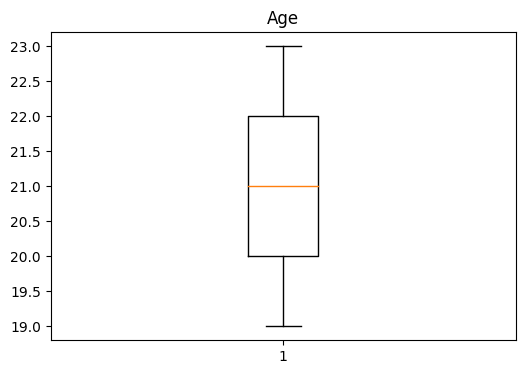

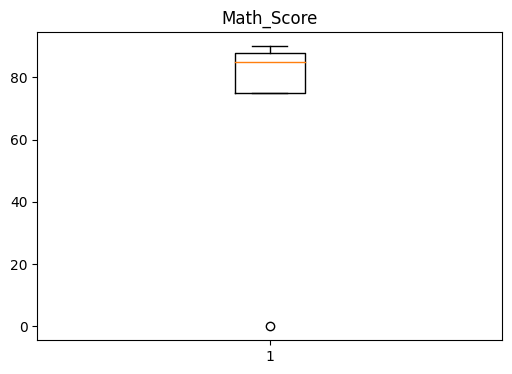

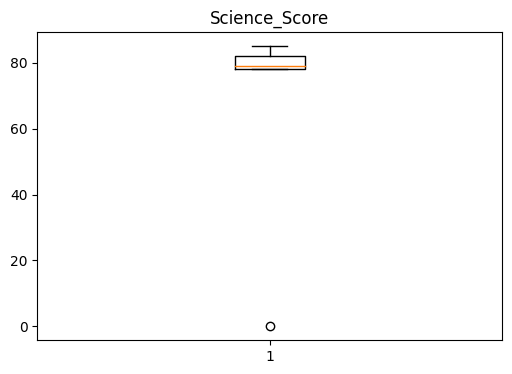

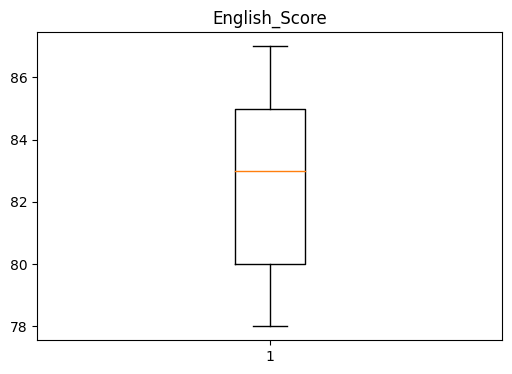

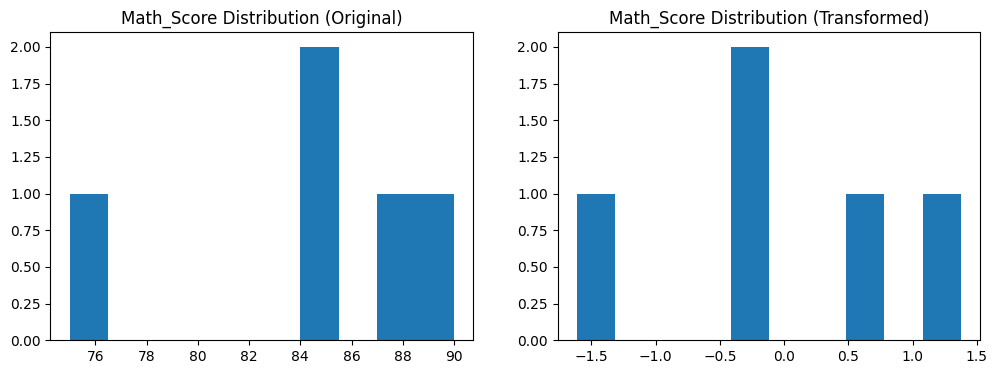

Transformed Dataset:
   Student_ID     Name   Age  Math_Score  Science_Score  English_Score  \
0         1.0     John  20.0        85.0           78.0           83.0   
1         2.0    Alice  22.0        90.0           82.0           87.0   
2         3.0      Bob  21.0        75.0           79.0           80.0   
3         4.0    Emily  19.0        85.0           79.0           78.0   
4         5.0  Michael  23.0        88.0           85.0           85.0   

   Math_Score_transformed  
0               -0.204278  
1                1.379588  
2               -1.612864  
3               -0.204278  
4                0.641831  


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Creating a sample Academic Performance dataset
data = {
    'Student_ID': [1, 2, 3, 4, 5],
    'Name': ['John', 'Alice', 'Bob', 'Emily', 'Michael'],
    'Age': [20, 22, 21, 19, 23],
    'Math_Score': [85, 90, 75, np.nan, 88],
    'Science_Score': [78, 82, np.nan, 79, 85],
    'English_Score': [83, 87, 80, 78, 85]
}

df = pd.DataFrame(data)

# 1. Dealing with missing values
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Replace missing values with the mean of the respective column
df.fillna(0, inplace=True)

# 2. Dealing with outliers
# Detecting outliers using boxplot
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

# For demonstration purposes, let's replace outliers with the median
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, df[col].median(), df[col])
    df[col] = np.where(df[col] > upper_bound, df[col].median(), df[col])

# 3. Data transformation
# Applying Power Transformation to Math_Score to reduce skewness
# Power Transformation helps to stabilize variance and make the data more Gaussian-like
pt = PowerTransformer()
df['Math_Score_transformed'] = pt.fit_transform(df[['Math_Score']])

# Visualize the distribution before and after transformation
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Math_Score'], bins=10)
plt.title('Math_Score Distribution (Original)')
plt.subplot(1, 2, 2)
plt.hist(df['Math_Score_transformed'], bins=10)
plt.title('Math_Score Distribution (Transformed)')
plt.show()

# Display the transformed dataset
print("Transformed Dataset:")
print(df)


In [105]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of    Student_ID     Name   Age  Math_Score  Science_Score  English_Score  \
0         1.0     John  20.0        85.0           78.0           83.0   
1         2.0    Alice  22.0        90.0           82.0           87.0   
2         3.0      Bob  21.0        75.0           79.0           80.0   
3         4.0    Emily  19.0        85.0           79.0           78.0   
4         5.0  Michael  23.0        88.0           85.0           85.0   

   Math_Score_transformed  
0               -0.204278  
1                1.379588  
2               -1.612864  
3               -0.204278  
4                0.641831  >

In [106]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import scipy.stats as stats


students ={
    'studentId':[1,2,3,4,5],
    'math_score':[56,np.nan,34,67,0],
    'science_score':[78, 88, 72, 85, 120],
    'English_Score': [80, 85, 70, 88, 92],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'Age': [18, 17, 18, 17, 19]
}

df = pd.DataFrame(students)



In [107]:
df.head()


,studentId,math_score,science_score,English_Score,Gender,Age
0,1,56.0,78,80,M,18
1,2,NaN,88,85,F,17
2,3,34.0,72,70,M,18
3,4,67.0,85,88,F,17
4,5,0.0,120,92,M,19


In [108]:

df.describe()


,studentId,math_score,science_score,English_Score,Age
count,5.000000,4.000000,5.000000,5.000000,5.00000
mean,3.000000,39.250000,88.600000,83.000000,17.80000
std,1.581139,29.545163,18.622567,8.485281,0.83666
min,1.000000,0.000000,72.000000,70.000000,17.00000
25%,2.000000,25.500000,78.000000,80.000000,17.00000
50%,3.000000,45.000000,85.000000,85.000000,18.00000
75%,4.000000,58.750000,88.000000,88.000000,18.00000
max,5.000000,67.000000,120.000000,92.000000,19.00000


In [109]:
# Display Missing values
missing_values = df.isnull().sum()

print("Missing_values:", missing_values)

Missing_values: studentId        0
math_score       1
science_score    0
English_Score    0
Gender           0
Age              0
dtype: int64


In [110]:
# Handle Missing values
df.fillna(0,inplace=True)

In [111]:
# Display Missing values
missing_values = df.isnull().sum()

print("Missing_values:", missing_values)

Missing_values: studentId        0
math_score       0
science_score    0
English_Score    0
Gender           0
Age              0
dtype: int64


In [112]:
print(df)

   studentId  math_score  science_score  English_Score Gender  Age
0          1        56.0             78             80      M   18
1          2         0.0             88             85      F   17
2          3        34.0             72             70      M   18
3          4        67.0             85             88      F   17
4          5         0.0            120             92      M   19


In [113]:
print(df['math_score'].median())
print(df['math_score'].mean())


34.0
31.4


<Axes: xlabel='studentId', ylabel='math_score'>

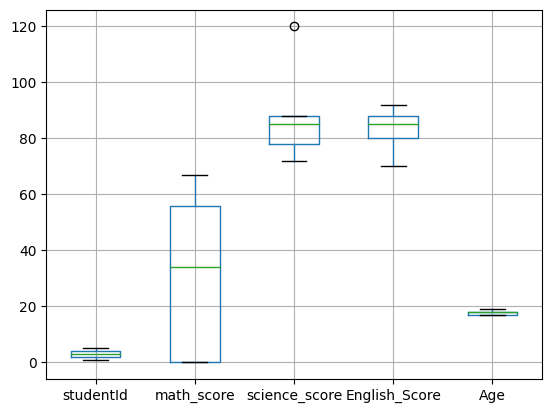

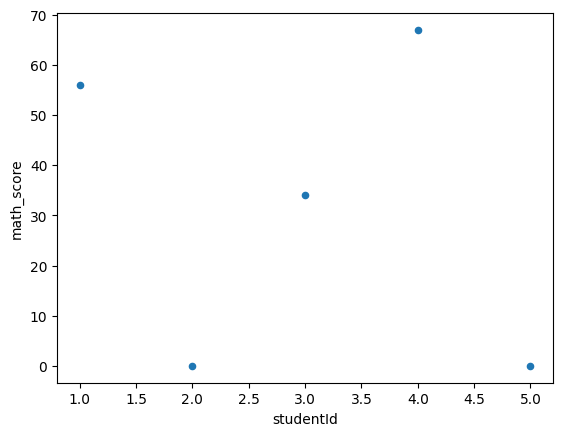

In [114]:

#  Display Outliers

#  Display Outliers

df[['studentId','math_score','science_score','English_Score',"Age"]].boxplot()

df[['studentId','math_score','science_score','English_Score',"Age"]].plot.scatter(x='studentId', y='math_score')


<Axes: ylabel='Frequency'>

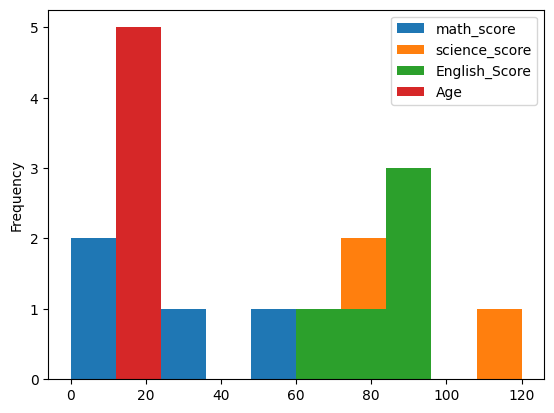

In [117]:

#  Display Outliers

df[['math_score','science_score','English_Score',"Age"]].plot.hist()


In [120]:
# detect Outliers

print("Outliers")
numeric_cols = df[['math_score','science_score','English_Score',"Age"]]
for col in numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQA = Q3 -Q1
    upper_bound = Q3 + 1.5 * IQA
    lower_bound = Q1 - 1.5 * IQA
    outliers = df[(df[col] > upper_bound)| (df[col]<lower_bound)]
    if not outliers.empty:
        print(f"{col}: {outliers}")







Outliers
science_score:    studentId  math_score  science_score  English_Score Gender  Age
4          5         0.0            120             92      M   19


In [121]:
# Handle Outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, df[col].median(), df[col])
    df[col] = np.where(df[col] > upper_bound, df[col].median(), df[col])


In [122]:
# detect Outliers

print("Outliers")

for col in numeric_cols:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQA = Q3 -Q1
    upper_bound = Q3 + 1.5 * IQA
    lower_bound = Q1 - 1.5 * IQA
    outliers = df[(df[col] > upper_bound)| (df[col]<lower_bound)]
    if not outliers.empty:
        print(f"{col}: {outliers}")







Outliers


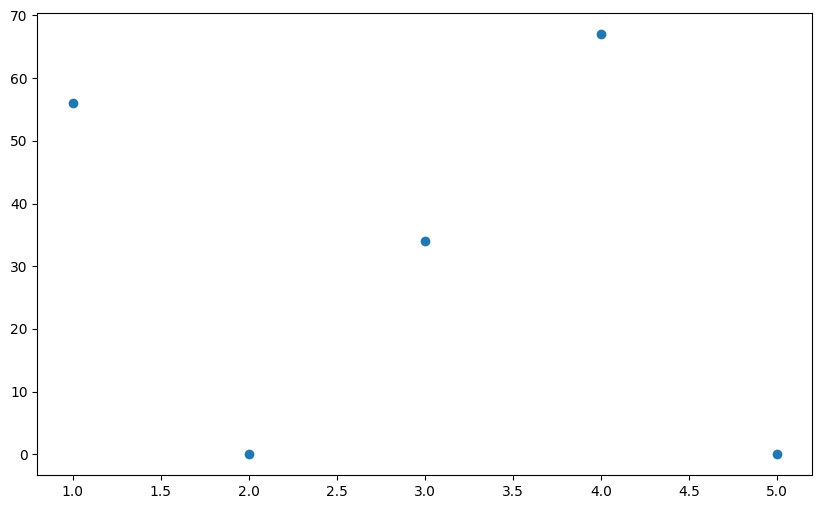

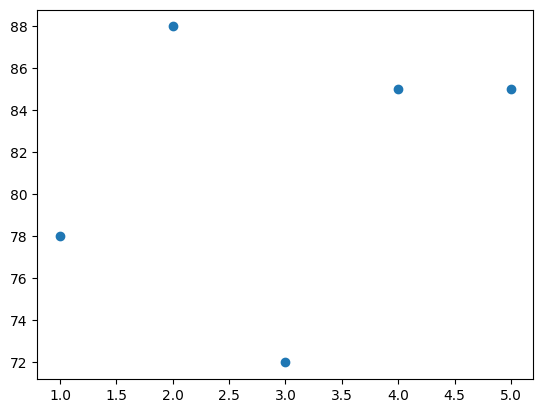

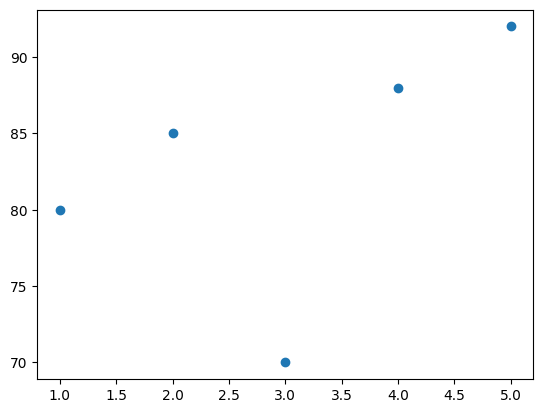

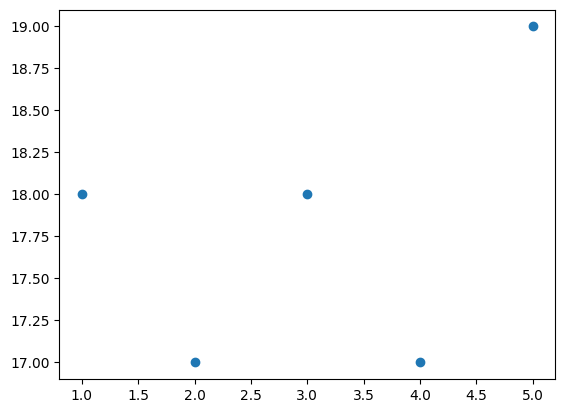

In [123]:
plt.figure(figsize=(10, 6))

for col in numeric_cols:
    plt.scatter(df['studentId'],df[col])
    # plt.plot(df['studentId'], df[col] , color='red', label='Linear Regression')
    # plt.legend()
    plt.show()